In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
from model_unet import simple_unet_model
from utils import read_image,postprocess_batchsize_one, overlay_result, create_rgb_mask

2023-08-04 15:29:17.254768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 15:29:18.055187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Segmentation color map
COLORMAP = [[53,17,236], [238,32,69], [250,250,55],[252,39,180]] #[[53,17,236],[250,250,55],[238,32,69]]
CLASSES = ['leaf_scald','red_strip','rust','white_mot'] #['Leaf Scald','Red Strip','Rust']

In [3]:
#Loading the model
model = simple_unet_model(512,512,3)
model.load_weights('/home/pratikshinde/sugarcane/exp/saved_weights/cp-0200.h5')   #'/workspace/sugarcane/exp1/saved_weights/cp-0200.h5'

2023-08-04 15:29:24.996615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 15:29:25.115515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 15:29:25.116145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [30]:
#Reading input image

input_tensor = read_image('/home/pratikshinde/sugarcane/data/images/1_830_2560_3421_3162.jpeg')  #'/workspace/sugarcane/data/images/1_830_2560_3421_3223.jpeg'

# Inferecing 
output = model.predict(np.expand_dims(input_tensor,axis=0))

# Post Process
output = postprocess_batchsize_one(output)


1/1 [==============================] - 0s 15ms/step


In [31]:
#Visualize RGB mask 
rgb_mask = create_rgb_mask(output,color_map=COLORMAP)

#Plotting 
plt.imshow(rgb_mask)
# cv2.imwrite(rgb_mask,"/workspace/AISSMS_Pomegranate_Demo/1.jpeg")

ValueError: could not broadcast input array from shape (3,) into shape (4,)

1/1 [==============================] - 0s 15ms/step


[ WARN:0@564.666] global loadsave.cpp:248 findDecoder imread_('/home/pratikshinde/sugarcane/data/images/1_830_2560_3421_3162.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

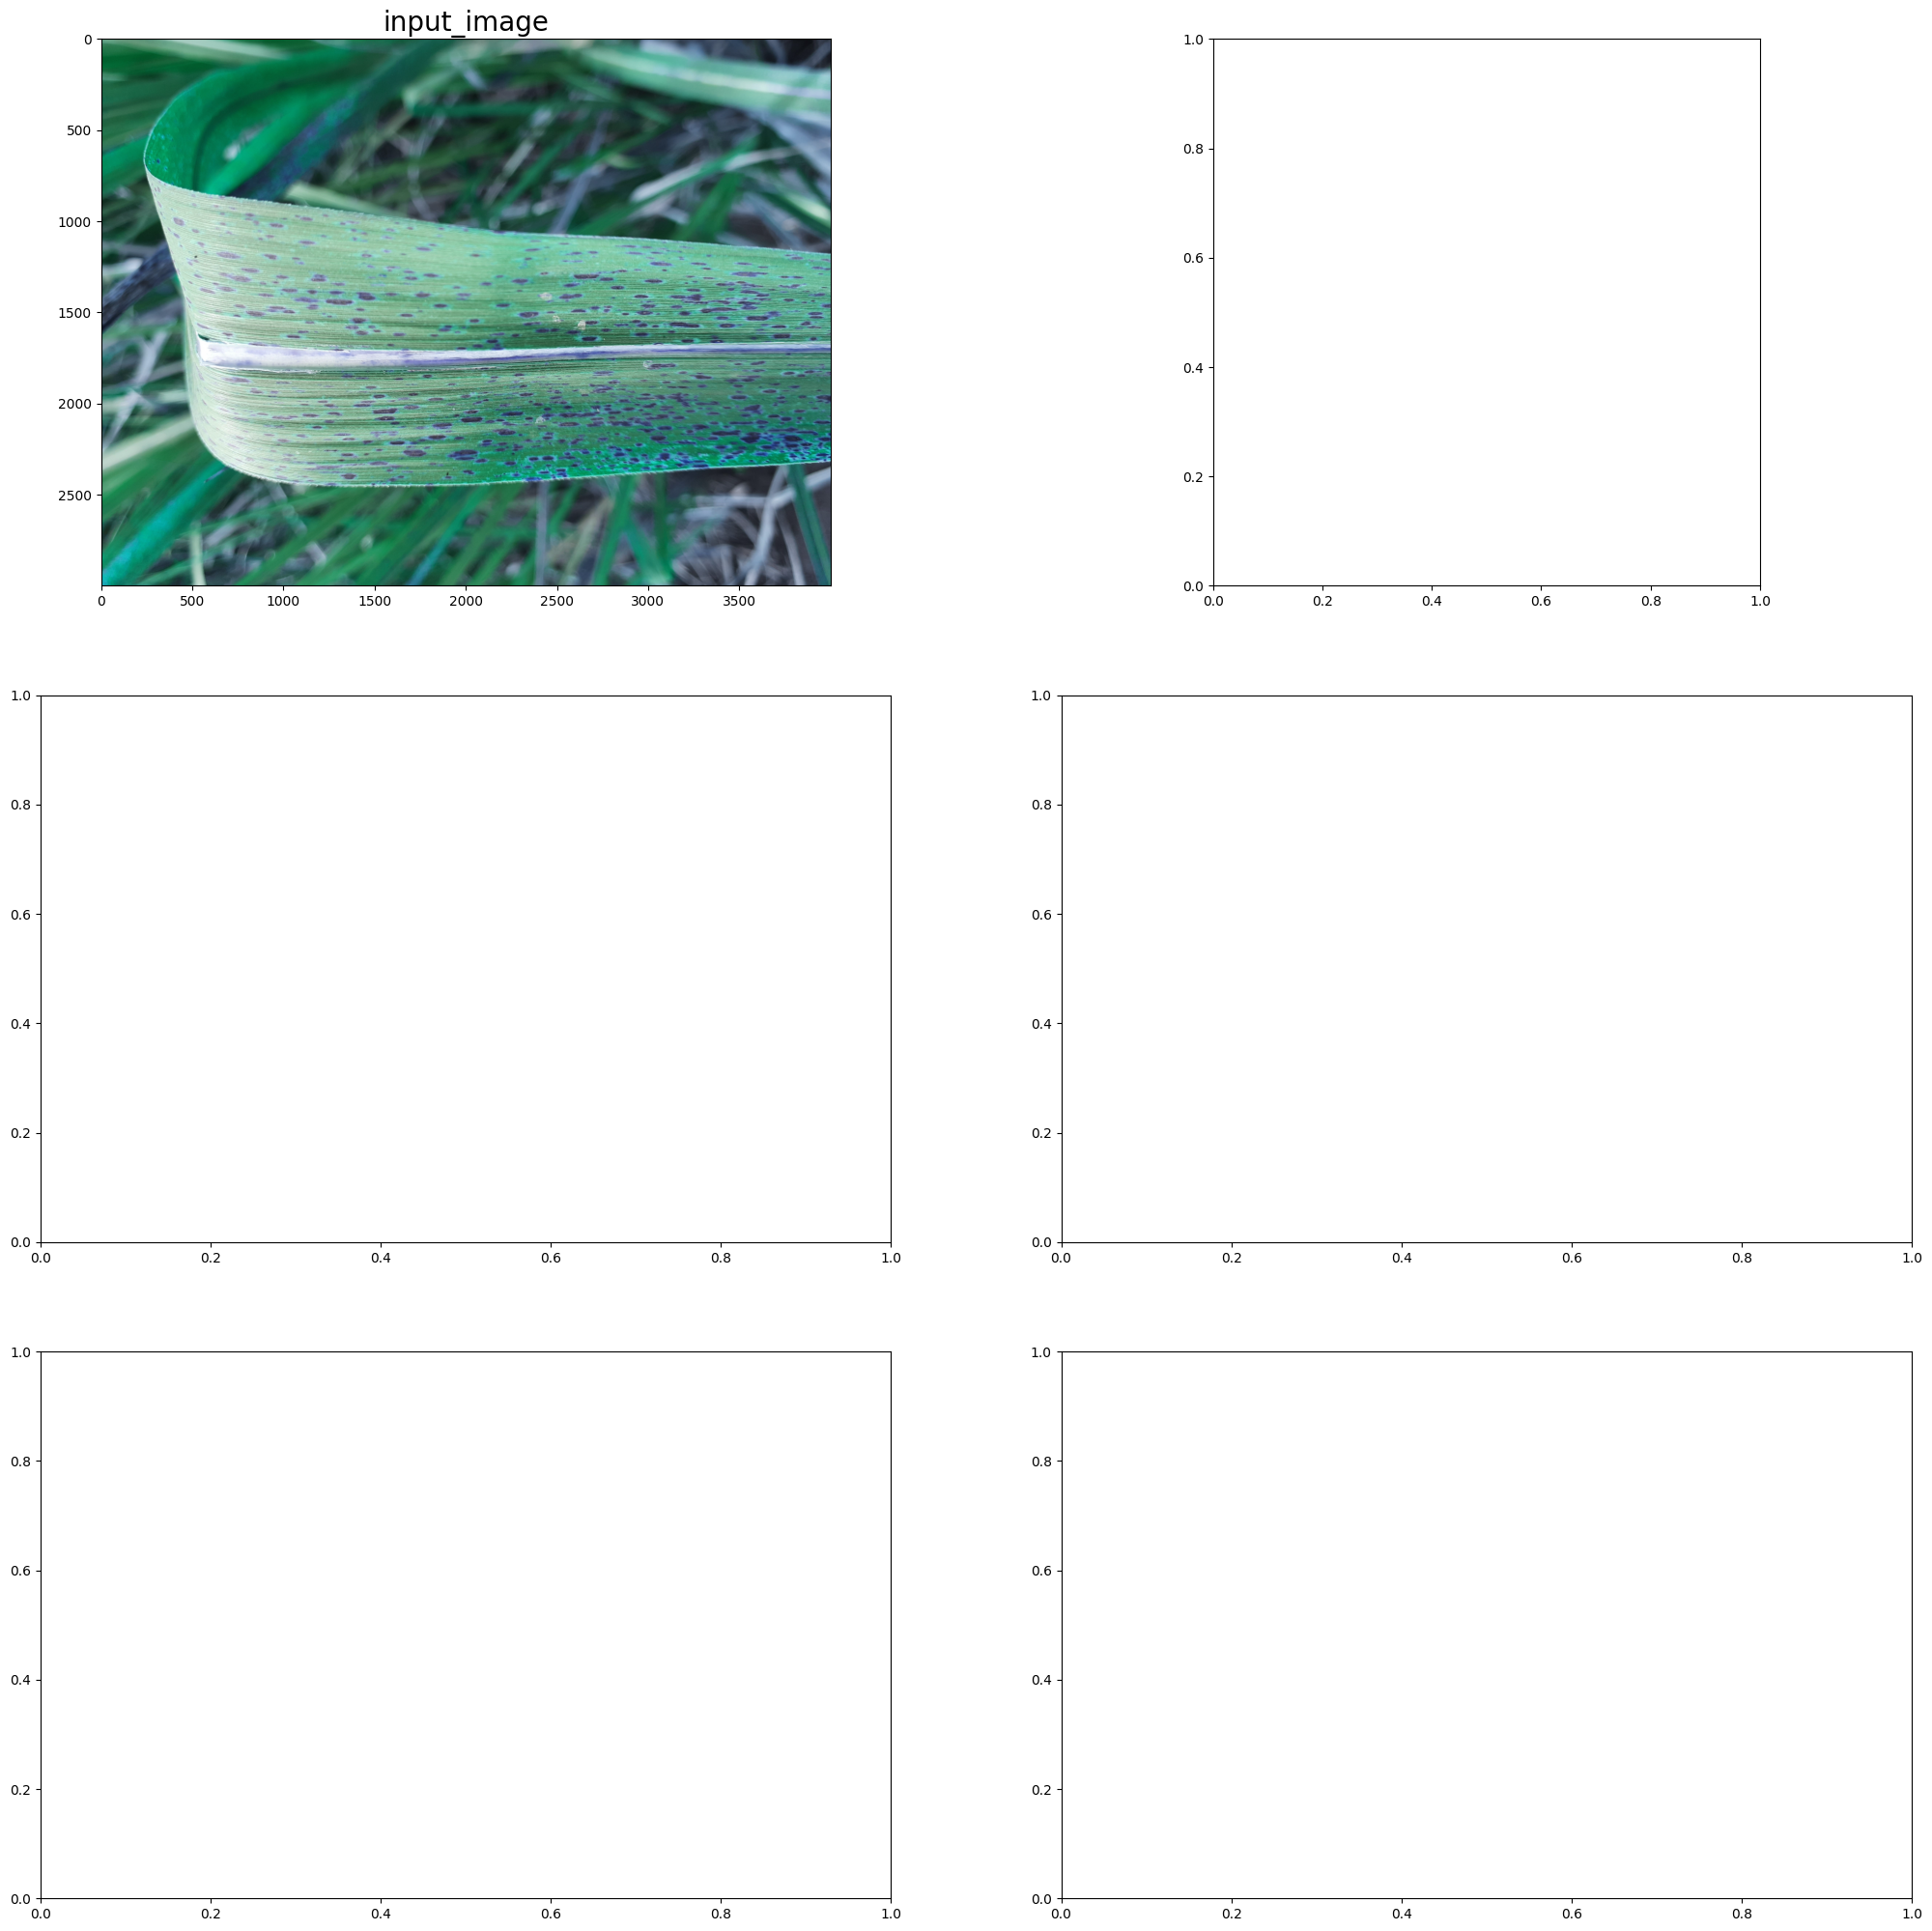

In [32]:
from utils import read_image,read_mask

fig, ax = plt.subplots(3,2 ,figsize=(25,25))

im_path = "/home/pratikshinde/sugarcane/data/images/1_830_2560_3421_3162.jpeg" #"/workspace/sugarcane/data/images/1_830_2560_3421_3223.jpeg"
mask_path = "/home/pratikshinde/sugarcane/data/images/1_830_2560_3421_3162.png" #"/workspace/sugarcane/data/masks/1_830_2560_3421_3223.png"

input_tensor = read_image(im_path)
output = model.predict(np.expand_dims(input_tensor,axis=0))
output = output[0]
output = np.where(output >0.5, 1, 0)

image = cv2.imread(im_path)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)
# mask = cv2.cvtColor(mask,cv2.COLOR_RGB2BGR)


ax[0,0].imshow(image)
ax[0,0].set_title('input_image',fontsize=20)

ax[0,1].imshow(mask)
ax[0,1].set_title('segmentation mask',fontsize=20)

ax[1,0].imshow(output[:,:,0])
ax[1,0].set_title('class 1:leaf_scald',fontsize=20)

ax[1,1].imshow(output[:,:,1])
ax[1,1].set_title('class 2:red_strip',fontsize=20)

ax[2,0].imshow(output[:,:,2])
ax[2,0].set_title('class 3:rust',fontsize=20)

ax[2,1].imshow(output[:,:,2])
ax[2,1].set_title('class 4:white_mot',fontsize=20)

ax[2,2].imshow(output[:,:,0])
ax[2,2].set_title('Overlay',fontsize=20)

plt.savefig('/home/pratikshinde/sugarcane/output/'+'b.jpeg')   #'/workspace/sugarcane/output/'+'b.jpeg'

In [6]:
# Code for 
# Overlay on Input Image

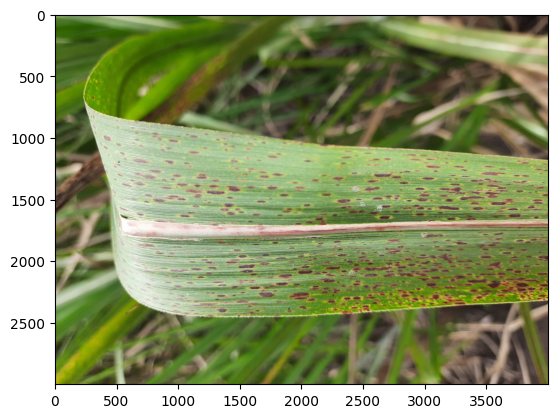

In [33]:

#Reading input Image
input_image = cv2.imread('/home/pratikshinde/sugarcane/data/images/1_830_2560_3421_3162.jpeg')   #'/workspace/sugarcane/data/images/1_830_2560_3421_3223.jpeg'
input_image=np.fliplr(input_image.reshape(-1,3)).reshape(input_image.shape)
plt.imshow(input_image)

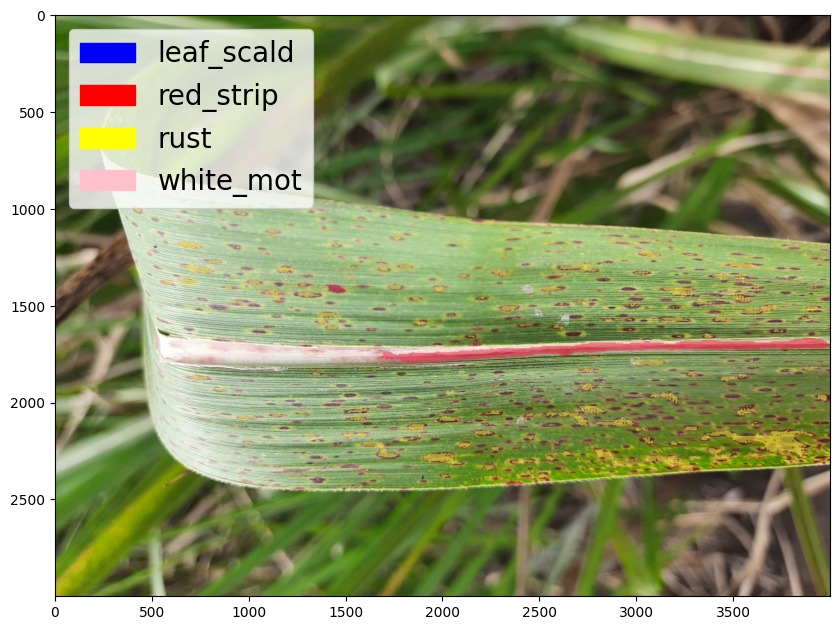

In [34]:
# Visualizing results
overlay = overlay_result(input_image,output,COLORMAP,alpha=0.5)

plt.figure(figsize = (10,10))
voilet_patch = mpatches.Patch(color='blue', label='leaf_scald')   #Leaf Scald
yellow_patch = mpatches.Patch(color='red', label='red_strip')   #Rust
pink_patch = mpatches.Patch(color='yellow', label='rust')                #Red Strip
purple_patch = mpatches.Patch(color='pink', label='white_mot')
plt.legend(handles=[voilet_patch,yellow_patch,pink_patch,purple_patch],loc=2, prop={'size': 20})

plt.imshow(overlay)

#Saving the figure
plt.savefig('/home/pratikshinde/sugarcane/output/sample_01')   #'/workspace/sugarcane/output/sample_out11.jpeg'